## Plots
### Author: Xiang Li



In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
def Add_common_header(df,common_header):
    name_list=[common_header]*len(df.columns)
    tuples = list(zip(name_list,df.columns))
    df.columns = pd.MultiIndex.from_tuples(tuples)
    return df


def DIR_CHECK_CREATE(Input_Path):
    if (not os.path.isdir(Input_Path)):
        print ("New Dir Made is" + Input_Path)
        os.mkdir(Input_Path)
    else: 
        print ('Dir Exists')

# Plot Part

In [3]:
import matplotlib
matplotlib.use('AGG')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white") 

# display plots in this notebook
%matplotlib inline

# Venn 2, 3 and 4

In [5]:
def Generate_Venn_Diagram(Raw_Path, Out_Path, Merge_Column):
    from matplotlib_venn import venn2
    
    DIR_CHECK_CREATE(Raw_Path)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')

        ### Union A and B, use indicator to differentiate them.
        union_A_B=df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer', indicator=True)

        intersection_A_B=union_A_B[union_A_B['_merge']=='both']
        only_A=union_A_B[union_A_B['_merge']=='left_only']
        only_B=union_A_B[union_A_B['_merge']=='right_only']

        #Output
        intersection_A_B.to_csv(OUT_PATH+'/Intersection_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_A.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[0][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        only_B.to_csv(OUT_PATH+'/Only_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
        union_A_B.to_csv(OUT_PATH+'/Union_'+INPUT_LIST[0][:-4]+'_'+INPUT_LIST[1][:-4]+FILE_TYPE,index=None, columns=[Merge_Column])
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')


    out = venn2(subsets=(len(only_A[Merge_Column]), len(only_B[Merge_Column]), len(intersection_A_B[Merge_Column])),
          set_labels=(INPUT_LIST[0][:-4], INPUT_LIST[1][:-4] ) )
    for text in out.subset_labels:
        text.set_fontsize(18)
    plt.show()
    
def Generate_Venn3_Diagram(Raw_Path, Out_Path, Merge_Column):
    from matplotlib_venn import venn3, venn3_circles
    
    DIR_CHECK_CREATE(Raw_Path)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 3:
        print ('Input Three, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C = df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C),3), dtype=int)


        for j in range(len(union_A_B_C)):
            if (union_A_B_C.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConC})

        intersection_metrix = intersection_metrix*1


        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        #intersection_metrix
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC

        A_solo = len(df_A) - ABC - AC - AB 
        B_solo = len(df_B) - ABC - BC - AB 
        C_solo = len(df_C) - ABC - AC - BC
        print (A_solo, B_solo, AB, C_solo, AC, BC, ABC)
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(8,8))
    out = venn3(subsets = (A_solo, B_solo, AB, C_solo, AC, BC, ABC), set_labels = (ConA, ConB, ConC))
    for text in out.subset_labels:
        if text == None:
            continue
        text.set_fontsize(18)
        
def Generate_Venn4_Diagram(Raw_Path, Out_Path, Merge_Column):
    import venn
    DIR_CHECK_CREATE(Raw_Path)
    DIR_CHECK_CREATE(Out_Path)
    Merge_Column='gene_id'
    
    INPUT_LIST=os.listdir(RAW_PATH)
    FILE_TYPE=INPUT_LIST[0][-4:]
    print('Input File: ' )
    print(INPUT_LIST)
    
    if len(INPUT_LIST) == 4:
        print ('Input Three, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]
        PATH_C = RAW_PATH + '/' +INPUT_LIST[2]
        PATH_D = RAW_PATH + '/' +INPUT_LIST[3]

        ConA=INPUT_LIST[0][:-4]
        ConB=INPUT_LIST[1][:-4]
        ConC=INPUT_LIST[2][:-4]
        ConD=INPUT_LIST[3][:-4]

        df_A = pd.read_csv(PATH_A,sep='\t')
        df_B = pd.read_csv(PATH_B,sep='\t')
        df_C = pd.read_csv(PATH_C,sep='\t')
        df_D = pd.read_csv(PATH_D,sep='\t')

        Merge_Column='gene_id'

        union_A_B_C_D = df_D.loc[:,[Merge_Column]].merge( df_C.loc[:, [Merge_Column]].merge( df_A.loc[:, [Merge_Column]].merge(df_B.loc[:,[Merge_Column]], how='outer'), how='outer'), how='outer')

        intersection_metrix=np.zeros( (len(union_A_B_C_D), 4), dtype=int)


        for j in range(len(union_A_B_C_D)):
            if (union_A_B_C_D.loc[j,'gene_id'] in df_A.loc[:,'gene_id']):
                intersection_metrix[j,0] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_B.loc[:,'gene_id']):
                intersection_metrix[j,1] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_C.loc[:,'gene_id']):
                intersection_metrix[j,2] == 1
            if (union_A_B_C_D.loc[j,'gene_id'] in df_D.loc[:,'gene_id']):
                intersection_metrix[j,3] == 1

        intersection_metrix = pd.DataFrame(union_A_B_C_D['gene_id'].isin(df_A['gene_id']))
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConA}),union_A_B_C_D['gene_id'].isin(df_B['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConB}),union_A_B_C_D['gene_id'].isin(df_C['gene_id'])], axis=1, join='inner')
        intersection_metrix = pd.concat([intersection_metrix.rename(columns={'gene_id':ConC}),union_A_B_C_D['gene_id'].isin(df_D['gene_id'])], axis=1, join='inner')
        intersection_metrix = intersection_metrix.rename(columns={'gene_id':ConD})

        intersection_metrix = intersection_metrix*1

        
        
        intersection_metrix ['ABCD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        intersection_metrix ['ABC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['ABD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,3]
        intersection_metrix ['ACD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]        
        intersection_metrix ['BCD'] = intersection_metrix.iloc[:,3]+intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        
        intersection_metrix ['AB'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,1]
        intersection_metrix ['AC'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,2]
        intersection_metrix ['AD'] = intersection_metrix.iloc[:,0]+intersection_metrix.iloc[:,3]
        intersection_metrix ['BC'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,2]
        intersection_metrix ['BD'] = intersection_metrix.iloc[:,1]+intersection_metrix.iloc[:,3]
        intersection_metrix ['CD'] = intersection_metrix.iloc[:,2]+intersection_metrix.iloc[:,3]
        
        
        
        #intersection_metrix
        ABCD = len(intersection_metrix[intersection_metrix['ABCD']==4])
        
        ABC = len(intersection_metrix[intersection_metrix['ABC']==3])
        ABD = len(intersection_metrix[intersection_metrix['ABD']==3])
        ACD = len(intersection_metrix[intersection_metrix['ACD']==3])
        BCD = len(intersection_metrix[intersection_metrix['BCD']==3])
        
        AB = len(intersection_metrix[intersection_metrix['AB']==2])   -ABC-ABD-ABCD
        AC = len(intersection_metrix[(intersection_metrix['AC']==2)]) -ABC-ACD-ABCD
        AD = len(intersection_metrix[intersection_metrix['AD']==2])   -ABD-ACD-ABCD
        BC = len(intersection_metrix[(intersection_metrix['BC']==2)]) -ABC-BCD-ABCD
        BD = len(intersection_metrix[(intersection_metrix['BD']==2)]) -ABD-BCD-ABCD
        CD = len(intersection_metrix[(intersection_metrix['CD']==2)]) -ACD-BCD-ABCD

        A_solo = len(df_A) - ABCD - ABC - ABD - ACD - AB - AC - AD
        B_solo = len(df_B) - ABCD - ABC - ABD - BCD - AB - BC - BD
        C_solo = len(df_C) - ABCD - ABC - ACD - BCD - AC - BC - CD
        D_solo = len(df_D) - ABCD - ABD - ACD - BCD - AD - BD - CD
        print (A_solo, B_solo, AB, C_solo, AC, BC, ABC)
    else:
        print('Error!')
        print('Input '+str(len(INPUT_LIST))+ ' Files')
        
    labels = venn.get_labels([{0},{0},{0},{0}],  fill=['number'])
    labels['1111'] = ABCD
    labels['1110'] = ABC
    labels['1101'] = ABD
    labels['1011'] = ACD
    labels['0111'] = BCD
    labels['1100'] = AB
    labels['1010'] = AC
    labels['1001'] = AD
    labels['0110'] = BC
    labels['0101'] = BD
    labels['0011'] = CD
    labels['1000'] = A_solo
    labels['0001'] = D_solo
    labels['0010'] = C_solo
    labels['0100'] = B_solo

    fig, ax = venn.venn4(labels, names=[ConA, ConB, ConC, ConD], figsize=(9,8))
    fig.show()
    
    #        Atlantic  Indian
    #whales     8        2
    #sharks     1        5
    #oddsratio, pvalue = stats.fisher_exact([[8, 2], [1, 5]])

    
    import scipy.stats as stats
    oddsratio, pvalue = stats.fisher_exact([[AC,AD],[BC,BD]])
    ax.set_title('Pvalue = '+ str(round(pvalue,5)), fontsize=28)

In [ ]:
Folder_Name='Down'
RAW_PATH=os.getcwd() + '/genelist/Venn/' + Folder_Name
OUT_PATH=os.getcwd() + '/genelist/Venn/Results_' + Folder_Name

Generate_Venn3_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

Dir Exists
Dir Exists
Input File: 
['up_DKO_0h_vs_WT_0h.bed', 'Up_DKO_CD8_0h_over_WT_CD8_0h_ZZ.bed']
Input Two, Continue.


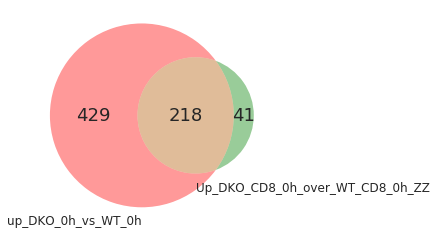

In [14]:
Folder_Name='Up'
RAW_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/' + Folder_Name
OUT_PATH=os.getcwd() + '/Venn_Results_WT_0h_DKO_0h_vs_ZZ_2016/Results_' + Folder_Name

Generate_Venn_Diagram(RAW_PATH, OUT_PATH, 'gene_id')

# Venn By Coordinates

In [11]:
def Generate_Venn_Diagram(Raw_Path, Out_Path, Merge_Column):
    from pybedtools import BedTool
    from matplotlib_venn import venn2

    Folder_Name='/CD8_Tcf1_ChIP_seq_Peaks'
    RAW_PATH = os.getcwd() +  Folder_Name
    OUT_PATH = os.getcwd() + Folder_Name
    #
    INPUT_LIST = os.listdir(RAW_PATH)

    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

    df1 = BedTool(PATH_A)
    df2 = BedTool(PATH_B)


    intersect_df = df1.intersect(df2, u=True)

    out = venn2(subsets=(len(df1-df2), len(df2-df1), len(df2+df1)),
              set_labels=(INPUT_LIST[0][7:-4], INPUT_LIST[1][7:-4]))
    for text in out.subset_labels:
        text.set_fontsize(14)


    plt.title(str(len(df2+df1))+'('+ str( len(df1+df2)) +')' )
    plt.show()
 
### To be finished
def Generate_Venn3_Diagram(Raw_Path, Out_Path, Merge_Column):
    from pybedtools import BedTool
    from matplotlib_venn import venn2

    Folder_Name='/CD8_Tcf1_ChIP_seq_Peaks'
    RAW_PATH = os.getcwd() +  Folder_Name
    OUT_PATH = os.getcwd() + Folder_Name
    #
    INPUT_LIST = os.listdir(RAW_PATH)

    if len(INPUT_LIST) == 2:
        print ('Input Two, Continue.')
        PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
        PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

    df1 = BedTool(PATH_A)
    df2 = BedTool(PATH_B)


    intersect_df = df1.intersect(df2, u=True)
    
    out = venn3( subsets = (A_solo, B_solo, AB, C_solo, AC, BC, ABC), 
                set_labels = (INPUT_LIST[0][7:-4], INPUT_LIST[1][7:-4], INPUT_LIST[2][7:-4]))
    out = venn2(subsets=(len(df1-df2), len(df2-df1), len(df2+df1)),
              set_labels=(INPUT_LIST[0][7:-4], INPUT_LIST[1][7:-4]))
    for text in out.subset_labels:
        text.set_fontsize(14)


    plt.title(str(len(df2+df1))+'('+ str( len(df1+df2)) +')' )
    plt.show()

Input Two, Continue.


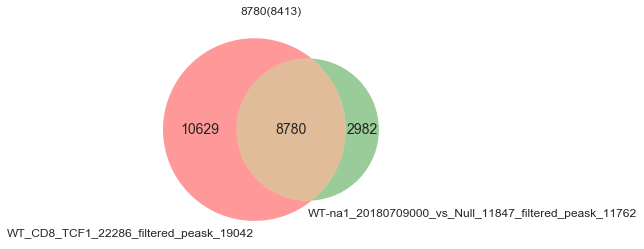

In [10]:
from pybedtools import BedTool
from matplotlib_venn import venn2

Folder_Name='/CD8_Tcf1_ChIP_seq_Peaks'
RAW_PATH = os.getcwd() +  Folder_Name
OUT_PATH = os.getcwd() + Folder_Name
#
INPUT_LIST = os.listdir(RAW_PATH)

if len(INPUT_LIST) == 3:
    print ('Input Two, Continue.')
    PATH_A = RAW_PATH + '/' +INPUT_LIST[0]
    PATH_B = RAW_PATH + '/' +INPUT_LIST[1]

df1 = BedTool(PATH_A)
df2 = BedTool(PATH_B)


intersect_df = df1.intersect(df2, u=True)

out = venn2(subsets=(len(df1-df2), len(df2-df1), len(df2+df1)),
          set_labels=(INPUT_LIST[0][7:-4], INPUT_LIST[1][7:-4]))
for text in out.subset_labels:
    text.set_fontsize(14)


plt.title(str(len(df2+df1))+'('+ str( len(df1+df2)) +')' )
plt.show()
#(df1+df2).saveas(str(len(df1+df2))+'_intersection_'+NAME1[1:-4]+'_'+NAME2[1:-4]+'.bed')
#(df2+df1).saveas(str(len(df2+df1))+'_intersection_'+NAME2[1:-4]+'_'+NAME1[1:-4]+'.bed')
#(df3+(df2+df1)).saveas(str(len(df3+(df2+df1)))+'_genelist_intersection_'+NAME2[1:-4]+'_'+NAME1[1:-4]+'.bed')

# heatmap

(5623, 29)

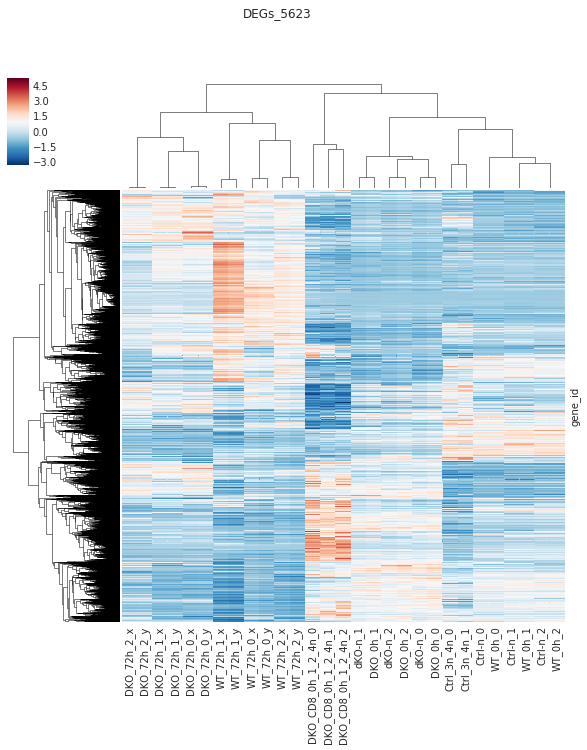

In [15]:
### Drop all zeros rows for plot
Heatmap_Df = df_ALL_DEGs.loc[(df_ALL_DEGs!=0).any(axis=1)]

Heatmap_Name='DEGs_'+str(len(Heatmap_Df.index))
#### Very Important

#Heatmap_Df=FPKM_df.fillna(0)

fig_1 = sns.clustermap(Heatmap_Df,  yticklabels=False, z_score=0, col_cluster=True, cmap='RdBu_r' )
fig_1.savefig(Heatmap_Name+'.png')
fig_1.fig.suptitle(Heatmap_Name)
Heatmap_Df.shape

# PCA



## Input a DataFrame then plot.

In [16]:
# PCA
df_2 = df_ALL_DEGs #.reset_index()

#### Remove unicode of list in python 
df2_gene_id = [x.encode('ascii', 'ignore') for x in df_2.index]


from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#### In here we set targets as the name of columns, which means our purpose is to compare \
#### the relationship between different columns.
targets= [x.encode('ascii', 'ignore') for x in df_2.columns]

colors=[]
for i in range(len(targets)):
    colors.append( "C"+ str(i))
    #print(colors[i])

################################################################################

df_2_T = df_2.transpose()

# Separating out the features
x = df_2_T.loc[ :, df2_gene_id ].values


# Separating out the target
y = df_2_T.loc[targets,:].values


# Standardizing the featuresbio
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


########### THIS is fucking killing me. reindex df with df2, just using following command.
principalDf.index = df_2_T.index

#finalDf = pd.concat( [principalDf, df_2_T.loc['target']], axis = 1)
principalDf

principal component 1  principal component 2
Ctrl_3n_4n_0                     -9.611481             -60.351322
Ctrl_3n_4n_1                     -8.146160             -57.424568
DKO_CD8_0h_1_2_4n_0             -59.608932              67.053024
DKO_CD8_0h_1_2_4n_1             -64.376341              54.908210
DKO_CD8_0h_1_2_4n_2             -72.795119              55.085117
Ctrl-n_0                        -27.296778             -46.508727
Ctrl-n_1                        -31.645623             -41.528416
Ctrl-n_2                        -32.462886             -41.049033
dKO-n_2                         -46.108241               7.843257
dKO-n_0                         -47.306553              11.530231
dKO-n_1                         -45.251939              12.622867
DKO_0h_1                        -46.334564              13.498760
DKO_0h_0                        -48.593499              12.431181
DKO_0h_2                        -47.263367               8.513449
DKO_72h_0_x                      44.267620              31.505023
DKO_72h_1_x                      44.332579              24.811732
DKO_72h_2_x                      24.906923              14.198455
WT_72h_0_x                       59.592459              -9.338370
WT_72h_1_x                       98.997213               8.153305
WT_72h_2_x                       72.395608              -3.119497
DKO_72h_0_y                      45.004703              31.921914
DKO_72h_1_y                      44.613035              24.943252
DKO_72h_2_y                      25.251349              14.347743
WT_0h_0                         -27.294237             -46.489167
WT_0h_1                         -31.664177             -41.597929
WT_0h_2                         -32.486455             -41.129411
WT_72h_0_y                       56.238557              -9.203429
WT_72h_1_y                       94.454273               7.621200
WT_72h_2_y                       68.192035              -3.248852

(5623, 29)

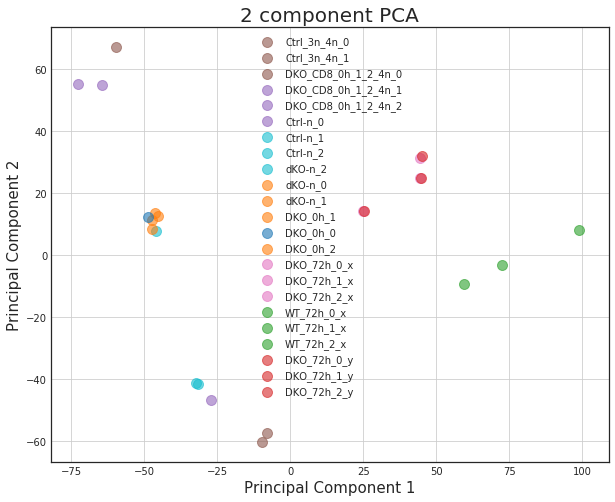

In [17]:
### PLOT

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

colors = ['C5','C5','C5',
          'C4','C4','C4',
          'C9','C9','C9',
          'C1','C1','C1',
          'C0','C1', 
          'C6','C6','C6',
          'C2','C2','C2',
          'C3','C3','C3']

for target, color in zip( targets,colors):
    indicesToKeep = principalDf.index == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , s = 100, c=color, alpha=0.6)
ax.legend(targets)
#ax.set_xlim(-2,8)
ax.grid()
Parameters_Detail='CD8_HP'
fig.savefig('PCA'+Parameters_Detail+'.png')
df_ALL_DEGs.shape

## Violin Plot

In [12]:
os.listdir(data_path)

['.ipynb_checkpoints',
 'Only_genelist_306_Newly_acquired_peaks_fc_4.0.bed',
 'Plot_PCA_Heatmap_Violin_venn_scattering.ipynb',
 'Only_genelist_537_lost_peaks_fc_4.0.bed',
 'WT_72h_vs_WT_0h_Expression.txt']

In [24]:
#pwd
import re
PATH_FOLDER=os.getcwd()
data_path = PATH_FOLDER
os.listdir(data_path)

NAME_1 ='/Only_genelist_306_Newly_acquired_peaks_fc_4.0.bed'
NAME_2 ='/Only_genelist_537_lost_peaks_fc_4.0.bed'

df1= pd.read_csv(data_path+NAME_1, sep='\t')
df2= pd.read_csv(data_path+NAME_2, sep='\t')
df_expression = pd.read_csv(data_path+'/WT_72h_vs_WT_0h_Expression.txt', sep='\t')


df_expression['fold_change'] = df_expression['WT_72h_']/df_expression['WT_0h_']
df1 = df1.merge(df_expression[['gene_id','fold_change']], on='gene_id',how='inner').replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df2 = df2.merge(df_expression[['gene_id','fold_change']], on='gene_id',how='inner').replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [44]:
df2.describe()

fold_change
count   619.000000
mean      1.394106
std       2.375673
min       0.000000
25%       0.691163
50%       0.934883
75%       1.285924
max      28.680858

In [39]:
df1.describe()

fold_change
count   296.000000
mean      2.673115
std       7.757429
min       0.000000
25%       0.719814
50%       1.017716
75%       1.517589
max      76.238787

P_value is: 1.8e-02


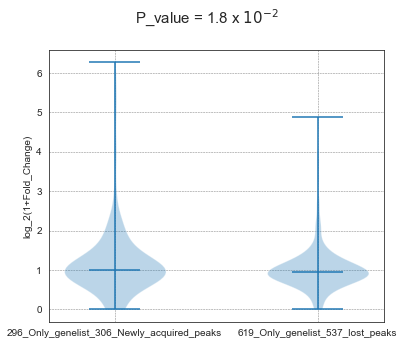

In [37]:
all_data=[np.log2(1+df1['fold_change']), np.log2(1+ df2['fold_change'])]

y_max, y_min = (max( [max(x)  for x in all_data ]), min( [min(x)  for x in all_data ]))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axes.violinplot( all_data,showmeans=False,showmedians=True)
axes.grid(color='grey', linestyle='dashed', linewidth=0.5)

axes.set_ylabel('log_2(1+Fold_Change)')


plt.setp( axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=[ str(len(all_data[0]))+'_'+NAME_1[1:-11], str(len(all_data[1]))+'_'+NAME_2[1:-11]])



from scipy import stats
MWU, pvalue = ( stats.mannwhitneyu(all_data[0], all_data[1], alternative=None )[0], 
                stats.mannwhitneyu(all_data[0], all_data[1], alternative='two-sided')[1])
#print "U= %d p = %.1e" % (MWU, pvalue)

if float("%.1e" % pvalue) == 1.0:
    plt.text(0.1, r'p = 1.0', fontsize=15)
    print('P_value is: %.1e' % pvalue )
else:
    if pvalue !=0:
        sign = '='
        digit, exp = re.search(r'(\S+)e(\S+)' , '%.1e' % pvalue).group(1,2)
        print('P_value is: %.1e' % pvalue )
        plt.text( 1.1, (y_max+1.0) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)
    else:
        sign, digit, exp = '<', '1.0', '-300'
        print('P_value is: %.1e' % pvalue )
        plt.text( 1.1, (y_max+1.0) , r'P_value {} {} x $10^{{{}}}$'.format(sign, digit, int(exp)), fontsize=15)

In [ ]:
df0_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_a = df0_a.set_index('gene_id').dropna(axis=0, how='any')
df0_a = df0_a.loc[ (df0_a['RPKM'] > 0 ) ]
df0_a = df0_a.rename(columns={'RPKM':'RPKM_WT_Only_Foxp3'})

df0_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Foxp3_5k.csv', sep='\t', header=0)
df0_b = df0_b.set_index('gene_id').dropna(axis=0, how='any')
df0_b = df0_b.loc[ (df0_b['RPKM'] > 0 ) ]
df0_b = df0_b.rename(columns={'RPKM':'RPKM_KO_Only_Foxp3'})

###################################################################################################################
df1_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_a = df1_a.set_index('gene_id').dropna(axis=0, how='any')
df1_a = df1_a.loc[ (df1_a['RPKM'] > 0 ) ]
df1_a = df1_a.rename(columns={'RPKM':'RPKM_WT_Intersection'})

df1_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Intersection_Foxp3_5k_Treg_TCF1.csv', sep='\t', header=0)
df1_b = df1_b.set_index('gene_id').dropna(axis=0, how='any')
df1_b = df1_b.loc[ (df1_b['RPKM'] > 0 ) ]
df1_b = df1_b.rename(columns={'RPKM':'RPKM_KO_Intersection'})

###################################################################################################################
df2_a = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_CD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_a = df2_a.set_index('gene_id').dropna(axis=0, how='any')
df2_a = df2_a.loc[ (df2_a['RPKM'] > 0 ) ]
df2_a = df2_a.rename(columns={'RPKM':'RPKM_WT_Only_Treg'})

df2_b = pd.read_csv(PATH_FOLDER+'RPKM_genes_read_count_Sample_TKOCD4_TCF1_20160827000_genelist_Only_Treg_TCF1.csv', sep='\t', header=0)
df2_b = df2_b.set_index('gene_id').dropna(axis=0, how='any')
df2_b = df2_b.loc[ (df2_b['RPKM'] > 0 ) ]
df2_b = df2_b.rename(columns={'RPKM':'RPKM_KO_Only_Treg'})

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))

axes[0,0].violinplot(  (np.log10(df0_a.iloc[:,0])),showmeans=False,showmedians=True )
axes[0,0].set_title('gene_list_WT_Only_FoxP3_'+str(len(df0_a)))

axes[1,0].violinplot( ( np.log10(df0_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,0].set_title('gene_list_KO_Only_FoxP3_'+str(len(df0_b)))



axes[0,1].violinplot( ( np.log10(df1_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,1].set_title('gene_list_WT_Intersection_'+str(len(df1_a)))

axes[1,1].violinplot( ( np.log10(df1_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,1].set_title('gene_list_KO_Intersection_'+str(len(df1_b)))



axes[0,2].violinplot( ( np.log10(df2_a.iloc[:,0] )),showmeans=False,showmedians=True)
axes[0,2].set_title('gene_list_WT_Only_Treg_'+str(len(df2_a)))

axes[1,2].violinplot( ( np.log10(df2_b.iloc[:,0] )),showmeans=False,showmedians=True)
axes[1,2].set_title('gene_list_KO_Only_Treg_'+str(len(df2_b)))



for i in range(2):
    for j in range(3):
        ax=axes[i,j]
        ax.yaxis.grid(True)
        #ax.set_xticks([y + 1 for y in range(max(df1))])
        ax.set_ylim(-0.5,2)
        ax.set_xlabel('Frequency')
        ax.set_ylabel('log10(RPKM)')

fig.savefig('gene_list_WT_KO.png') 

# Scattering Plot + Heatmap

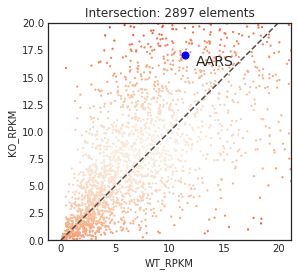

In [30]:
df_gene_Intersection_WT = df_high_gene['Naive_CD4_Rest']
df_gene_Intersection_KO = df_high_gene['Naive_Rest_CD8']


from scipy.stats import gaussian_kde
        # Calculate the point density
fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(5, 4)) #, sharex=False, sharey=True)

range_limit=20
xy = np.vstack([df_gene_Intersection_WT.values, df_gene_Intersection_KO.values])
z = gaussian_kde(xy)(xy)

axis.axis('equal')
cax_1 = axis.scatter(df_gene_Intersection_WT.values, df_gene_Intersection_KO.values, alpha=1.0,s=5,c=z, label='HIGH_IRI',edgecolor='')

###  highlight a point
highlight_index='AARS'
axis.scatter(df_gene_Intersection_WT[df_gene_Intersection_WT.index == highlight_index],
            df_gene_Intersection_KO[df_gene_Intersection_KO.index == highlight_index],
            alpha=1.0,s=50,color='blue', label=highlight_index,edgecolor='blue')
axis.text(df_gene_Intersection_WT[df_gene_Intersection_WT.index == highlight_index]+range_limit/20,
            df_gene_Intersection_KO[df_gene_Intersection_KO.index == highlight_index]-range_limit/20, highlight_index, fontsize=14)
###

axis.set_title('Intersection: '+ str(len(df_gene_Intersection_WT)) + ' elements')
axis.plot([0,range_limit], [0, range_limit], ls="--", c=".3")



axis.set_ylim(-0,range_limit)
axis.set_xlim(-0,range_limit)
axis.set_xlabel('WT_RPKM')
axis.set_ylabel('KO_RPKM')

fig.subplots_adjust(right=0.8)
#cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7]) # A 4-length sequence of [left, bottom, width, height] quantities.
#fig.colorbar(cax=cbar_ax)



    